## Problem Statement:

#Objective:

To create a useful tool for Jamboree that helps Indian students predict their chances of getting into Ivy League colleges.

#Key Goals:

#Identify Important Factors:

Find out the key things that affect admissions to Ivy League schools for Indian students. These might include grades, test scores (GMAT, GRE, SAT), activities outside of school, work experience, recommendation letters, and personal essays.

#Understand Relationships:

See how these factors influence each other and how they work together to affect admission chances. Determine the importance of each factor in the admission process.

#Build Predictive Insights:

Develop a model that can predict a student’s chances of getting into an Ivy League school based on their profile. Use past data and statistical methods to make accurate predictions.

#Improve User Experience:

Add this predictive model to Jamboree’s website in a way that’s easy to use. Students should be able to enter their details and see their admission chances, along with tips to improve their profiles.

#Expected Outcomes:

* A clear understanding of the factors affecting Ivy League admissions for Indian students.

* A reliable model that predicts admission chances.


* A user-friendly tool on Jamboree’s website that gives students personalized admission insights and advice.


This will help Jamboree guide their students better, increasing their chances of getting into top colleges.

## Description of Variables:

● Serial No.: This column represents the unique row identifier for each applicant in the
dataset.


● GRE Scores: This column contains the GRE (Graduate Record Examination) scores of
the applicants, which are measured on a scale of 0 to 340.


● TOEFL Scores: This column includes the TOEFL (Test of English as a Foreign Language)
scores of the applicants, which are measured on a scale of 0 to 120.


● University Rating: This column indicates the rating or reputation of the university that
the applicants are associated with.


○ The rating is based on a scale of 0 to 5, with 5 representing the highest rating.


● SOP: This column represents the strength of the applicant's statement of purpose,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.


● LOR: This column represents the strength of the applicant's letter of recommendation,
rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.


● CGPA: This column contains the undergraduate Grade Point Average (GPA) of the
applicants, which is measured on a scale of 0 to 10.


● Research: This column indicates whether the applicant has research experience (1) or
not (0).


● Chance of Admit: This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

# Importing The Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/jam.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.shape

(500, 9)

In [8]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
df.drop('Serial No.',axis=1,inplace=True)

# Graphical Analysis

# Univariate Analysis

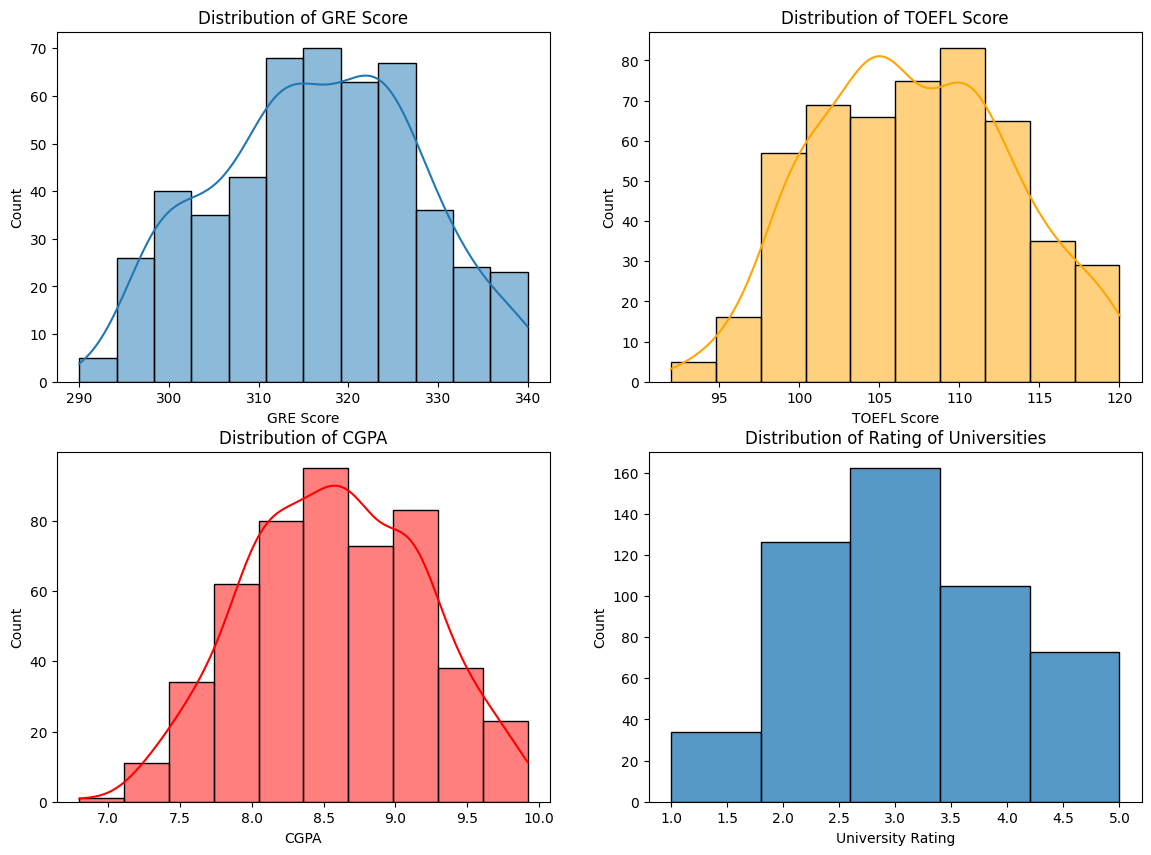

In [11]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['GRE Score'],kde=True,ax=axes[0,0])
axes[0,0].set_title('Distribution of GRE Score')

# Plot the second distribution with KDE
sns.histplot(df['TOEFL Score'], bins=10, kde=True, color='orange', label='TOEFL',ax=axes[0,1])
axes[0,1].set_title('Distribution of TOEFL Score')

# Plot the second distribution with KDE
sns.histplot(df['CGPA'], bins=10, kde=True, color='red', label='CGPA',ax=axes[1,0])
axes[1,0].set_title('Distribution of CGPA')

# Plot the second distribution with KDE
sns.histplot(df['University Rating'], bins=5, label='University Rating',ax=axes[1,1])
axes[1,1].set_title('Distribution of Rating of Universities')


plt.show()



*   It seems like both GRE Score, CGPA and TOEFL SCORE follows normal distribution




In [12]:

# Rename the column to remove the trailing space
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

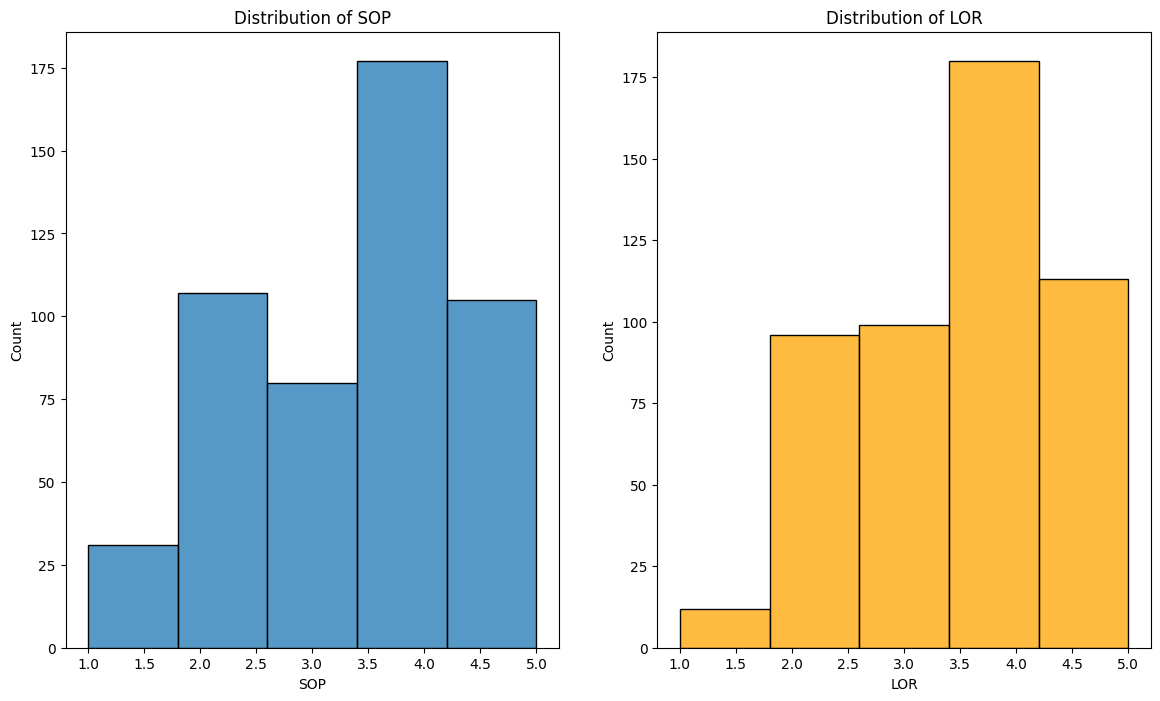

In [13]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.histplot(df['SOP'],bins=5,ax=axes[0])
axes[0].set_title('Distribution of SOP')

# Plot the second distribution with KDE
sns.histplot(df['LOR'], bins=5, color='orange',ax=axes[1])
axes[1].set_title('Distribution of LOR')



plt.show()



*   Most Number of students have SOP and LOR rating in the range of 3.5-4.0



In [14]:
df['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64



*   We can see that 280 students has Research experience whereas other 220 students don't have any research experience.



# Bivariate Analysis

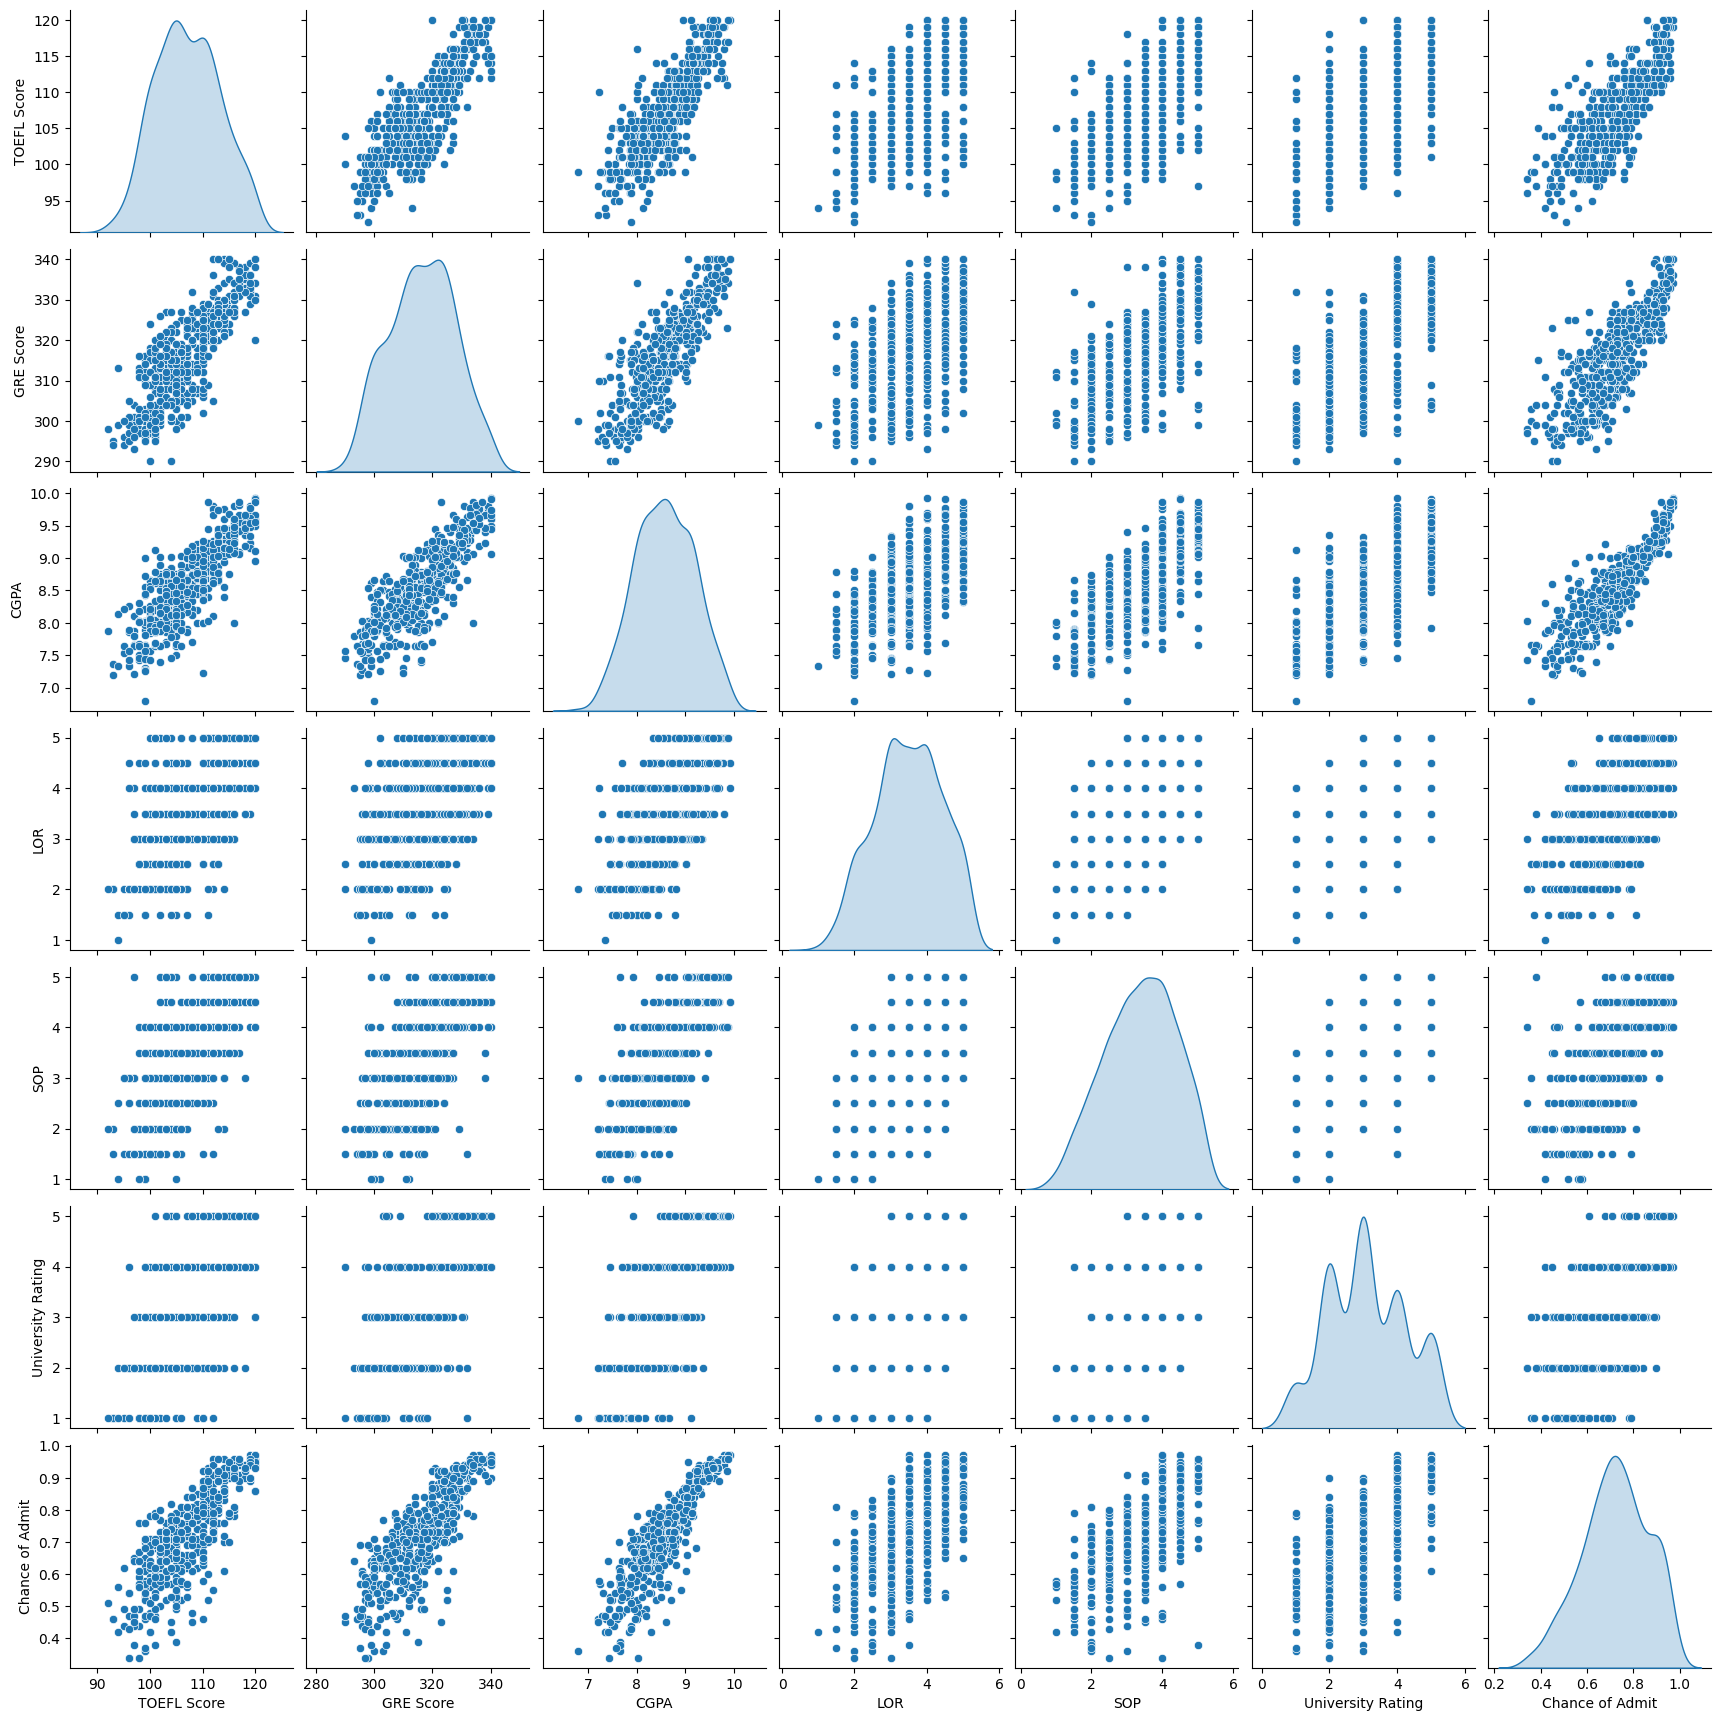

In [15]:
# Create pairplot with custom diagonal plot kind
sns.pairplot(df[['TOEFL Score','GRE Score','CGPA','LOR','SOP','University Rating','Chance of Admit']], diag_kind='kde')

# Display the plot
plt.show()


# Data Preprocessing

# Checking for duplicate and null values

In [16]:
df.duplicated().sum()

0

In [17]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# Checking for Outliers

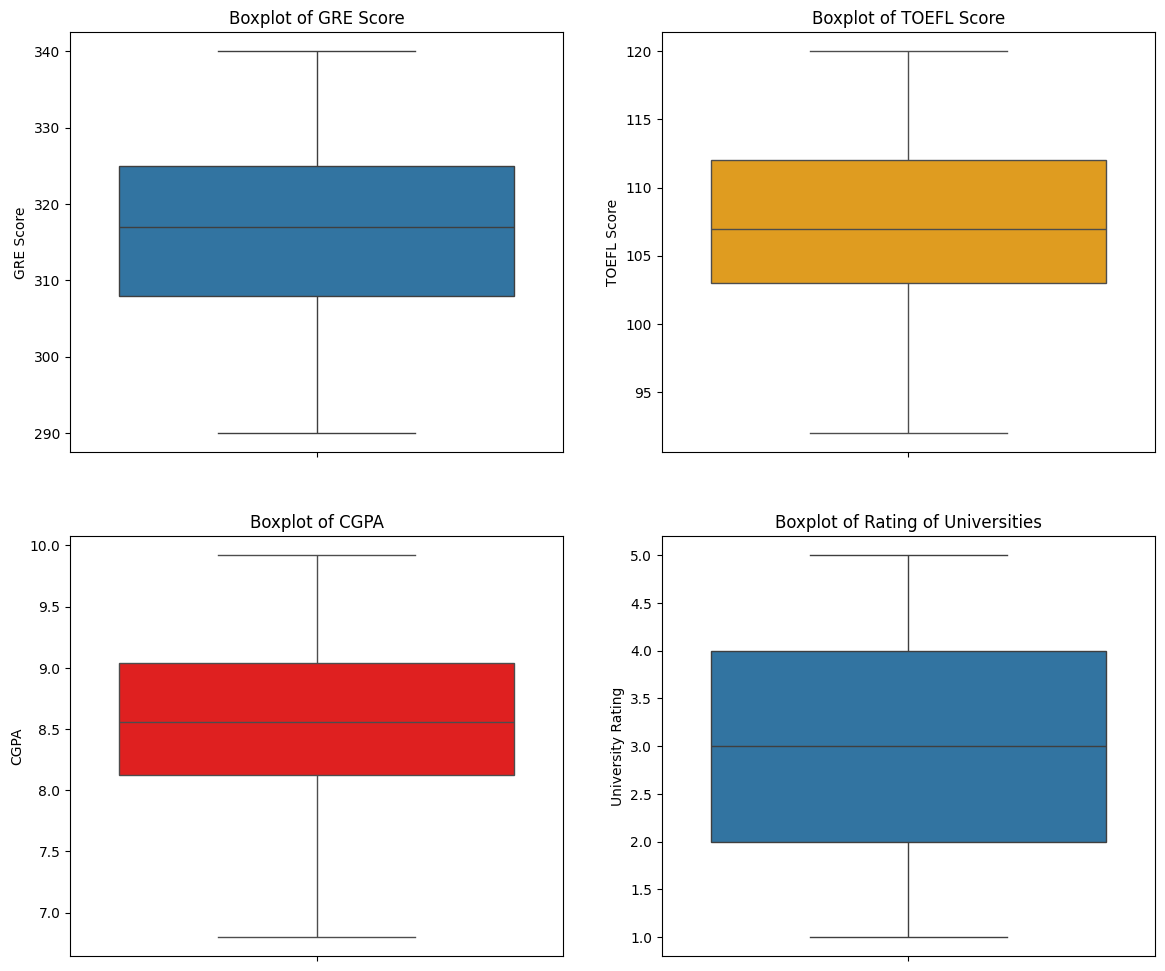

In [18]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.boxplot(df['GRE Score'],ax=axes[0,0])
axes[0,0].set_title('Boxplot of GRE Score')

# Plot the second distribution with KDE
sns.boxplot(df['TOEFL Score'], color='orange',ax=axes[0,1])
axes[0,1].set_title('Boxplot of TOEFL Score')

# Plot the second distribution with KDE
sns.boxplot(df['CGPA'], color='red',ax=axes[1,0])
axes[1,0].set_title('Boxplot of CGPA')

# Plot the second distribution with KDE
sns.boxplot(df['University Rating'],ax=axes[1,1])
axes[1,1].set_title('Boxplot of Rating of Universities')


plt.show()

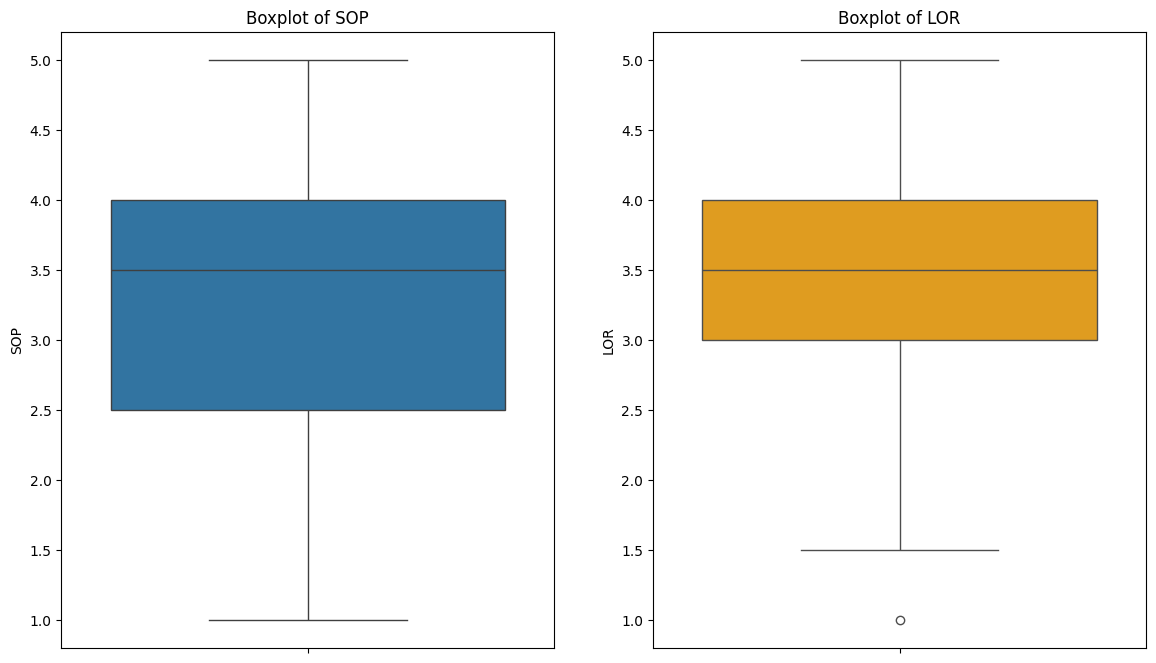

In [19]:
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

sns.boxplot(df['SOP'],ax=axes[0])
axes[0].set_title('Boxplot of SOP')

# Plot the second distribution with KDE
sns.boxplot(df['LOR'], color='orange',ax=axes[1])
axes[1].set_title('Boxplot of LOR')



plt.show()

 * There is only one outlier present in LOR feature. For practical purposes we
can ignore it since it will not effect much in our overall analysis.

## Checking for Correlation

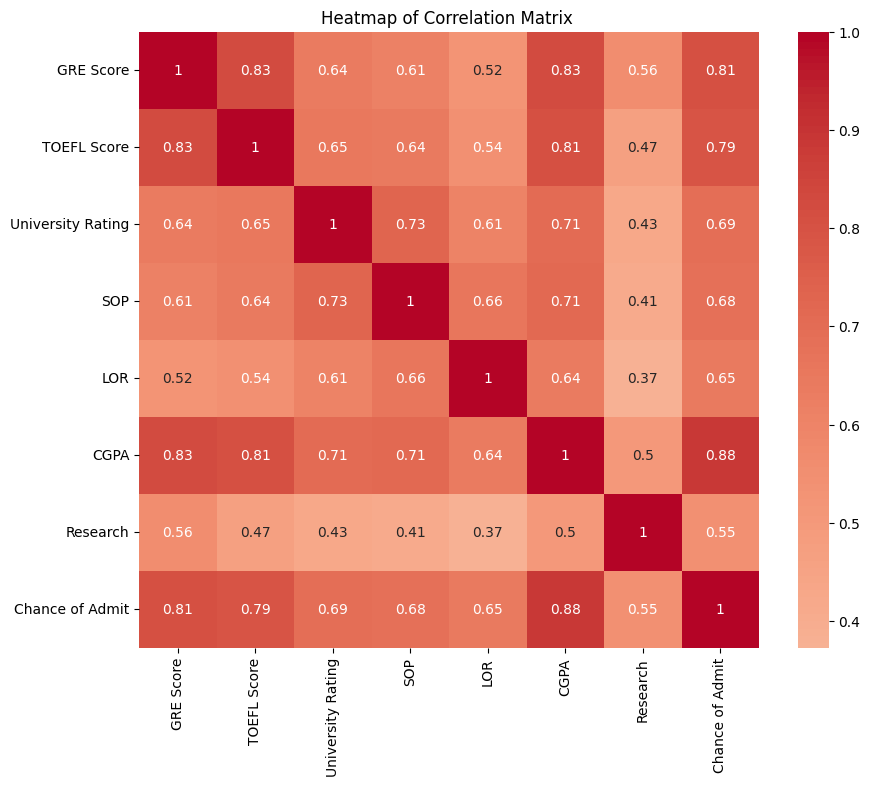

In [20]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)

# Add title
plt.title('Heatmap of Correlation Matrix ')
plt.show()



*   Since the correlation between any two variables is not exceeding 0.9 hence we do not have to drop any features for model building.



## Data Preperation for Model Building

In [21]:
x=df[['TOEFL Score','GRE Score','CGPA','LOR','SOP','University Rating','Research']]
y=df['Chance of Admit']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((375, 7), (125, 7), (375,), (125,))

# Standardization of features

In [24]:
from sklearn.preprocessing import StandardScaler

# Assuming x_train and x_test are your feature matrices and y_train, y_test are your target vectors

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Transform the testing data using the same scaler
x_test_scaled = scaler.transform(x_test)

# Convert scaled arrays back to DataFrame with original column names
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# Building the model

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train) # training phase

LinearRegression()

In [26]:
# Coefficients
coefficients = model.coef_

# Intercept
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [0.01555651 0.02262286 0.07093878 0.01546166 0.00332157 0.00698371
 0.01384143]
Intercept: 0.7268799999999999


In [27]:
y_hat=model.predict(x_test_scaled)

y_hat

array([0.96480181, 0.53920048, 0.53061023, 0.52841639, 0.83969187,
       0.50408585, 0.5954899 , 0.51829639, 0.84923953, 0.64336714,
       0.63707573, 0.74231867, 0.61223937, 0.73301058, 0.9096634 ,
       0.62786543, 0.55948015, 0.65725105, 0.67417303, 0.80673634,
       0.61788802, 0.84144593, 0.66270278, 0.64080985, 0.80252116,
       0.69544149, 0.66678266, 0.60291851, 0.96755598, 0.46846028,
       0.45236007, 0.5135426 , 0.62008003, 0.5550894 , 0.61768665,
       0.64862048, 0.60809284, 0.79665744, 0.58561002, 0.84150076,
       0.77083147, 0.65516183, 0.64934159, 0.77183178, 0.66585645,
       0.79973261, 0.6848379 , 0.52024116, 0.57617643, 0.50473236,
       0.72232947, 0.69257146, 0.86174804, 0.95686994, 0.77547631,
       0.88587464, 0.68370929, 0.99061241, 0.7504766 , 0.52552702,
       0.71411065, 0.64589276, 0.64784902, 0.82716531, 0.61485432,
       0.67952336, 0.52882649, 0.84033869, 0.81359624, 0.69368194,
       0.65742513, 0.98279028, 0.63925803, 0.78565073, 0.70434

Mean Absolute Error (MAE): 0.0512
Mean Squared Error (MSE): 0.0046
Root Mean Squared Error (RMSE): 0.0677
R² Score: 0.7590


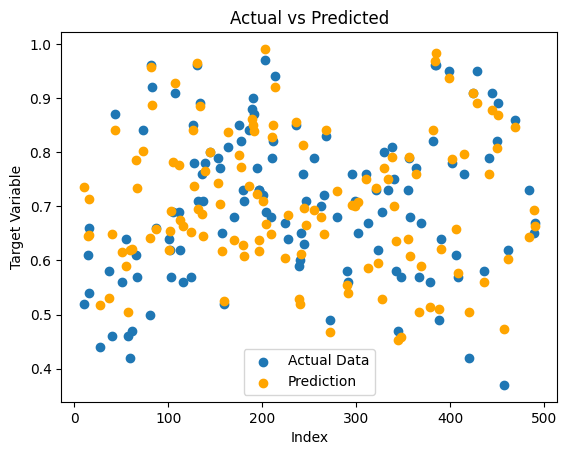

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_hat)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot the results
fig = plt.figure()
plt.scatter(x_test.index, y_test, label='Actual Data')  # Using index for x-axis
plt.scatter(x_test.index, y_hat, color='orange', label='Prediction')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.title('Actual vs Predicted')
plt.show()

# OLS Method

In [29]:
import statsmodels.api as sm

# Reset the index of y_train
y_train_reset_index = y_train.reset_index(drop=True)

# Add constant to the features (intercept)
x_train_scaled_with_intercept = sm.add_constant(x_train_scaled)

# Fit OLS model
ols_model = sm.OLS(y_train_reset_index, x_train_scaled_with_intercept).fit()

# Get p-values
p_values = ols_model.pvalues

print("P-values:", p_values)

P-values: const                0.000000e+00
TOEFL Score          9.236496e-03
GRE Score            5.582037e-04
CGPA                 7.226508e-25
LOR                  2.253143e-04
SOP                  5.056108e-01
University Rating    1.406477e-01
Research             1.693688e-04
dtype: float64


In [30]:
# Get summary of the model
summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     276.0
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          5.55e-142
Time:                        13:38:43   Log-Likelihood:                 544.85
No. Observations:                 375   AIC:                            -1074.
Df Residuals:                     367   BIC:                            -1042.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7269      0.00

# Dropping Insignificant variables and retrain the model

In [31]:
x_train_scaled1=x_train_scaled.drop(['SOP','University Rating'],axis=1)

In [32]:
# Add constant to the features (intercept)
x_train_scaled1_with_intercept = sm.add_constant(x_train_scaled1)

# Fit OLS model
ols_model1 = sm.OLS(y_train_reset_index, x_train_scaled1_with_intercept).fit()

# Get p-values
p_values = ols_model1.pvalues

print("P-values:", p_values)

P-values: const          0.000000e+00
TOEFL Score    2.708104e-03
GRE Score      4.347032e-04
CGPA           4.426484e-28
LOR            1.994281e-06
Research       9.496205e-05
dtype: float64


In [33]:
# Get summary of the model
summary = ols_model1.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     383.6
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          9.78e-144
Time:                        13:38:43   Log-Likelihood:                 542.89
No. Observations:                 375   AIC:                            -1074.
Df Residuals:                     369   BIC:                            -1050.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7269      0.003    245.437      

In [34]:
x_test_scaled1=x_test_scaled.drop(['SOP','University Rating'],axis=1)

# Add constant to the features (intercept)
x_test_scaled1_with_intercept = sm.add_constant(x_test_scaled1)

y_hat=ols_model1.predict(x_test_scaled1_with_intercept)

In [45]:
y_hat1=ols_model1.predict(x_train_scaled1_with_intercept)

# Testing the assumptions of linear regression

# Multicollinearity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = x_train_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(x_train_scaled.values, i) for i in range(x_train_scaled.shape[1])]

print(vif_data)

             feature       VIF
0        TOEFL Score  4.048918
1          GRE Score  4.837650
2               CGPA  4.682896
3                LOR  1.973323
4                SOP  2.847248
5  University Rating  2.563277
6           Research  1.520328


 No feature has VIF>=5. Hence we are not dropping any of the features.





# Mean of residuals should be close to zero.

In [46]:
residuals=(y_train-y_hat1).sum()
print(residuals)

1.1447834745880534


# Test for Homoscedasticity

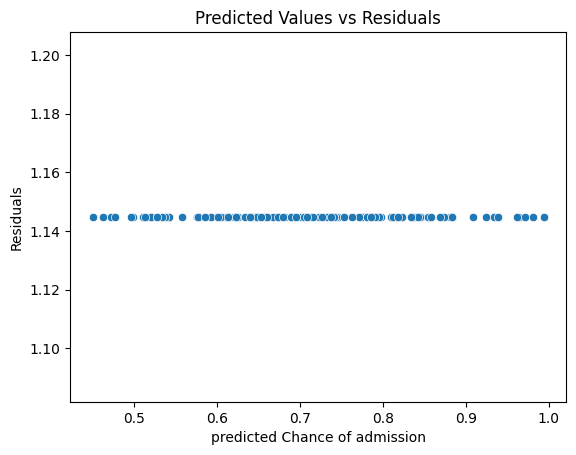

In [47]:
sns.scatterplot(x=y_hat,y=residuals)
plt.xlabel("predicted Chance of admission")
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.show()

From this visualization it's clear that the data is homoscedastic.

In [38]:

from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name=['F-statistic','P-value']
test=sms.het_goldfeldquandt(ols_model1.resid,ols_model1.model.exog)
lzip(name,test)

[('F-statistic', 0.9123383526893322), ('P-value', 0.7313415632076381)]

Since P>0.05 hence we cannot reject the null hypothesis. There is no heteroskedasticity.

## Normality of Residuals

<ipython-input-48-ecba0ccb153a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train-y_hat1,kde=True)


<Axes: ylabel='Density'>

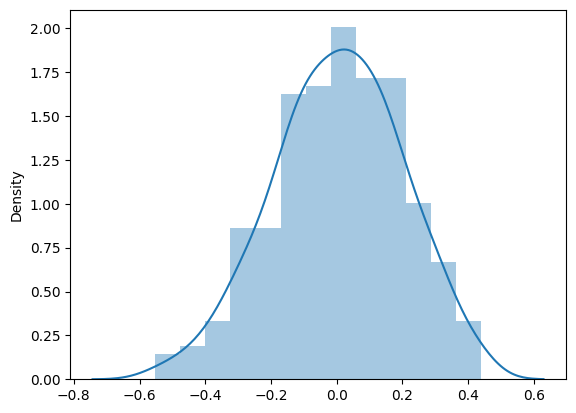

In [48]:
sns.distplot(y_train-y_hat1,kde=True)

It seems like the distribution is following normal curve.


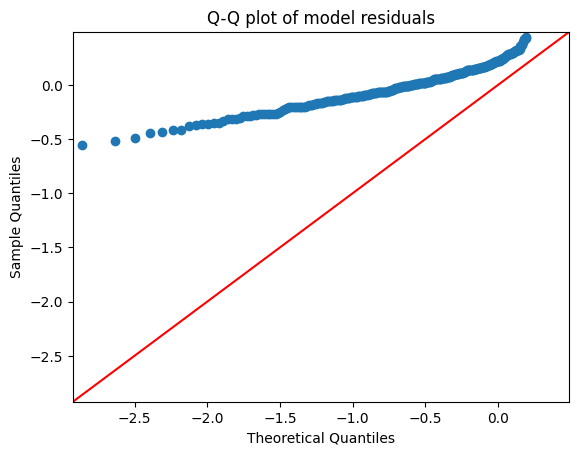

In [49]:
residuals = y_train - y_hat1
sm.qqplot(residuals, line ='45')
plt.title('Q-Q plot of model residuals')
plt.show()

## MODEL PERFORMANCE

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE, RMSE, R2, and Adjusted R2
mae = mean_absolute_error(y_test, y_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_hat))
r2 = r2_score(y_test, y_hat)

# Adjusted R-squared calculation
def adjusted_r2(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

n = x_test.shape[0]  # Number of observations in test set
k = x_test.shape[1]  # Number of features
adj_r2 = adjusted_r2(r2, n, k)

# Print the performance metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Square Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")
print(f"Adjusted R-squared: {adj_r2:.4f}")


Mean Absolute Error (MAE): 0.0505
Root Mean Square Error (RMSE): 0.0676
R-squared (R²): 0.7595
Adjusted R-squared: 0.7451


#Intuition

*   The features of the model can explain 75.95% of the variability in the dependent variable.




#Based on the model evaluation results and the regression analysis, here are some summarized recommendations:

#Model Performance:

* Mean Absolute Error (MAE): 0.0505



* On average, the predicted values are off by about 0.0505 from the actual values, which is quite low, indicating good prediction accuracy.


* Root Mean Square Error (RMSE): 0.0676


* This measure indicates that the model’s predictions are fairly accurate, with a typical prediction error of about 0.0676.


* R-squared (R²): 0.7595


* Approximately 75.95% of the variance in the "Chance of Admit" can be explained by the model's features. This is a good level of explanatory power.

#OLS Regression Results:
* R-squared (R²): 0.839

* A higher value than the test R², indicating that the model fits the training data well.
* Adjusted R-squared: 0.836
* Consistent with the high R², showing a robust model fit even after accounting for the number of predictors.
* F-statistic: 383.6 (Prob > F: 9.78e-144)
* The very high F-statistic and extremely low p-value indicate that the overall model is statistically significant.

#Understanding the Coefficients:

* Coefficient Interpretation:

* Constant (Intercept): 0.7269

* This is the baseline value of the "Chance of Admit" when all predictors are zero. It serves as the starting point for predictions.
* TOEFL Score: 0.0177

* For each additional point in the TOEFL score, the "Chance of Admit" increases by approximately 0.0177, holding all other factors constant. This indicates that higher TOEFL scores positively impact admission chances.
* GRE Score: 0.0231

* For each additional point in the GRE score, the "Chance of Admit" increases by approximately 0.0231, holding all other factors constant. This shows that GRE scores are an important factor in the admissions process.
* CGPA: 0.0741

* For each additional point in CGPA, the "Chance of Admit" increases by approximately 0.0741, holding all other factors constant. This is the largest coefficient, indicating that CGPA has the strongest impact on admission chances.
* LOR (Letter of Recommendation): 0.0183

* For each additional point in the strength of the letters of recommendation, the "Chance of Admit" increases by approximately 0.0183, holding all other factors constant. Strong recommendations significantly enhance admission prospects.

* Research: 0.0144

* Having research experience increases the "Chance of Admit" by approximately 0.0144, holding all other factors constant. Engaging in research is beneficial for admission chances.

# Statistical Significance:
* P-values for all coefficients are very low (p < 0.05), indicating that all predictors are statistically significant.

# Recommendations for Students:

## Prioritize Academic Scores:

* TOEFL and GRE Scores: Aim for high scores in these exams as they positively
influence admission chances.
* CGPA: Maintain a high GPA throughout your academic career as it has the strongest impact on admissions.
## Strengthen Letters of Recommendation:

* Work on obtaining strong letters of recommendation from professors or mentors who know you well and can vouch for your abilities and potential.
## Engage in Research:

* Participate in research projects and seek opportunities to gain research experience, as it adds value to your application.